# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Taburno, Jasper Thon\
_Student No._: 202008096\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Jasper Thon Jaducana Taburno

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/30
* Problem 2 - []/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*


### Import Packages

In [ ]:
import numpy as np
import cmath as cm
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft, rfft2, irfft2

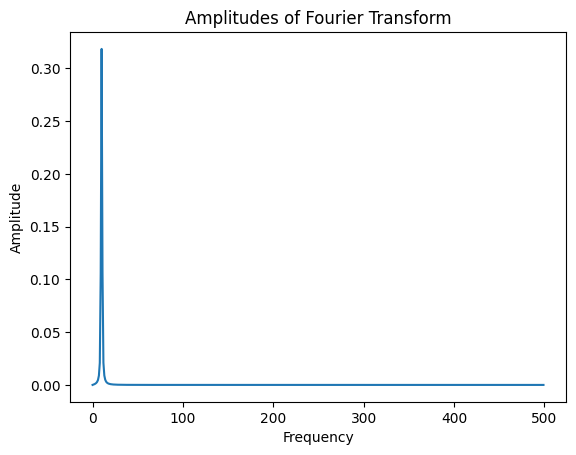

In [ ]:
def modulated_sine_wave(N):
    n = np.arange(N)
    y = np.sin(np.pi * n / N) * np.sin(20 * np.pi * n / N)
    return y

def calculate_fourier_transform(y):
    N = len(y)
    fft_result = np.fft.fft(y)
    fft_amplitudes = np.abs(fft_result) / N  # Normalize by dividing by N
    return fft_amplitudes

def plot_amplitudes(fft_amplitudes):
    plt.plot(fft_amplitudes[:N // 2])  # Plot only the positive frequencies
    plt.title("Amplitudes of Fourier Transform")
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")
    plt.show()

# Parameters
N = 1000

# Step 1: Calculate the coefficients in the discrete Fourier transform
y = modulated_sine_wave(N)
fft_amplitudes = calculate_fourier_transform(y)

# Step 2: Make a plot of the amplitudes
plot_amplitudes(fft_amplitudes)

### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

'04 IPA DepEd M&E Indicators 3.pptx'
 09-12-2020-21.25.01.pdf
'09-20-2020-15.55.56(1).pdf'
 09-20-2020-15.55.56.pdf
 1b1.jpg
 202008096-22014650-PaymentSlip.pdf
 202008096-22027525-PaymentSlip.pdf
 202008096.JPG
'Anyfile Notepad Files'
 AP155
'AP155 - 20231109 - Module 6 - Random Processes and Monte Carlo Methods (1).pptx'
'AP155 - 20231109 - Module 6 - Random Processes and Monte Carlo Methods.pptx'
'Blank Quiz.gform'
 BSPhysics_curriculum.pdf
'BS Physics Curriculum.png'
'BSPhysics_curriculum_post (1).pdf'
 BSPhysics_curriculum_post.pdf
'Bulawanong Maribel (1080p).mp4'
 BUOYANCY.gdoc
 Classroom
'Colab Notebooks'
'Copy of xij-gpci-zis (2020-12-09 at 21:58 GMT-8)'
'cram gaming'
'CRS Screenshot (1).png'
'CRS Screenshot (2).png'
'CRS Screenshot.png'
'David J. Griffiths - Introduction to Electrodynamics-Pearson Education (2012).pdf'
'Dost Scholarship Requirements (1).png'
'Dost Scholarship Requirements (2).png'
'Dost Scholarship Requirements.png'
 dow.txt
'[EDITED] E3 Rotation Laboratory Ma

Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/AP155/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [ ]:
import numpy as np
dow = np.loadtxt(file_path+"dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

In [ ]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

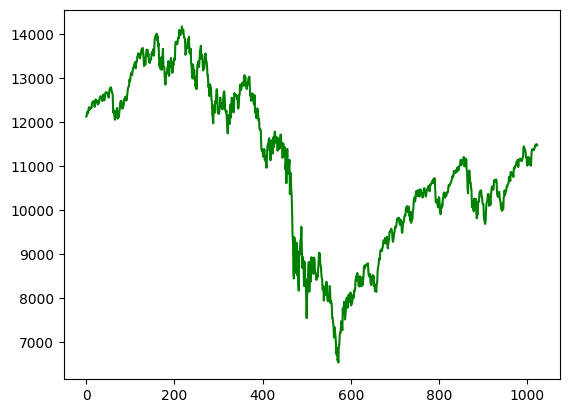

In [ ]:
plt.plot(dow,color='green')
plt.show()

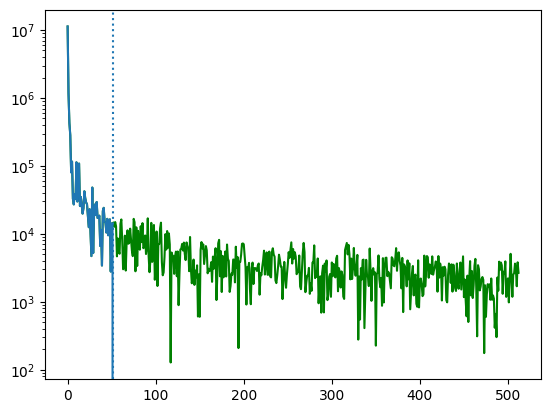

In [ ]:
c=rfft(dow) #calculates the fast Fourier transform of the real-valued array dow (r=real)
plt.plot(abs(c),color='g') #plots coeficient of the Fourier transform

for k in range(len(c)//10+1,len(c)): #setting all but the first 10% of the elemnts to zero
    c[k]=0
plt.plot(abs(c))
plt.axvline(x=len(c)//10+1,linestyle = ':') #boundary
plt.yscale("log") #convert y-axis scale to logarithmic
plt.show()

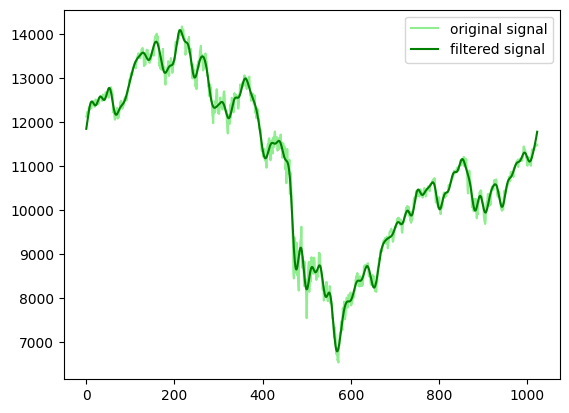

In [ ]:
z=irfft(c) #apply inverse FFT using irfft for the first 10% of the Fourier Coefficients of the og signal
plt.plot(dow,color='lightgreen',label='original signal')
plt.plot(z,color='g',label='filtered signal')
plt.legend()
plt.show()

As evident from the observations, the original plot's initial noises have been successfully eliminated. The filtered signal now exhibits reduced chaos and a more polished appearance.  Note that even with only 10% of the data, we achieved an effective degree of noise filtration. This suggests that the predominant waveform is confined to the initial 10% of the plot, corresponding to lower frequencies in the FFT space, while the subsequent 90% predominantly consists of random noise in the plot.